importing modules and dataframe

In [39]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn 
path = r"C:\Users\kaifk\lpth\.vscode\DataSciencePrac\EmailSpamClassifier\spam_ham_dataset.csv\spam_ham_dataset.csv"
path2 = r"C:\Users\kaifk\lpth\.vscode\DataSciencePrac\EmailSpamClassifier\spam_ham_dataset.csv\spam.csv"
df2=pd.read_csv(path2)
df = pd.read_csv(path)


In [40]:
df2.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
df = df.drop(['Unnamed: 0','label_num'],axis=1)



In [42]:
df.columns=['Label','EmailText']
df.head()


,Label,EmailText
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [43]:
df.isna().sum()

Label        0
EmailText    0
dtype: int64

In [44]:
np.round(df.duplicated().sum()/ len(df) , 2)

0.03

In [45]:
df= df.drop_duplicates()

In [46]:
df.shape

(4993, 2)

In [47]:
df.head()

,Label,EmailText
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


<Axes: xlabel='Label', ylabel='count'>

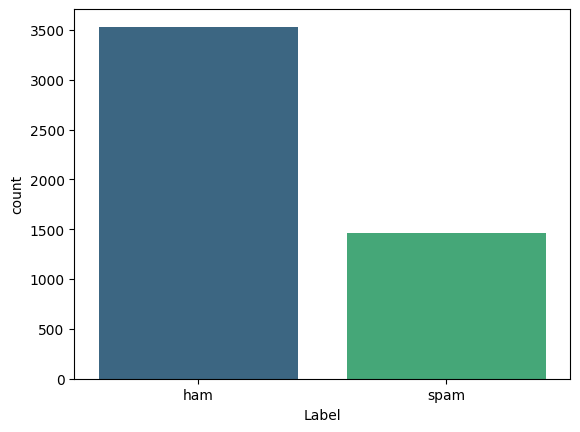

In [50]:
sns.countplot(x='Label', data=df, palette='viridis', order=df['Label'].value_counts().index)


In [54]:
import nltk

nltk.download('stopwords')
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaifk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaifk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kaifk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kaifk\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [63]:
import re
import unicodedata

from string import punctuation
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
 
# print(stopwords.words('english'))

STOPWORDS = stopwords.words('english')
STEMMER = PorterStemmer()
LEMMANTIZER = WordNetLemmatizer()

def process_text(
    text, tokenized=False, lowercase=True, remove_punctuation=True,
    remove_digit=True, remove_stopwords=True, add_stopwords=[],
    ngrams=None, use_stem_lemmantize='stem',
):
    stopwords_ = set(STOPWORDS).union(set(add_stopwords))
    stopwords_ = set([s.lower() for s in stopwords_])
    # normalize, lowercase, tokenize, remove punctuation
    tokens = unicodedata.normalize('NFKC', text)
    tokens = tokens.lower() if lowercase else tokens
    if not tokenized:
        if remove_punctuation:
            pattern = '[{}\s]+'.format(punctuation)
        else:
            pattern = '([{}]+)'.format(punctuation)
            tokens = re.sub(pattern, r' \1 ', tokens)
            pattern = '\s+'
        tokens = re.split(pattern, tokens)
    # processs
    p_tokens = list()
    for token in tokens:
        # remove digit
        if remove_digit:
            token = re.sub('\d+', '', token)
        # remove stopwords
        if remove_stopwords:
            token = '' if token.lower() in stopwords_ else token
        p_tokens.append(token)
    tokens = [t for t in p_tokens if len(t) > 0]
    # stemming or lemmantizing
    if use_stem_lemmantize == 'stem':
        tokens = [STEMMER.stem(t) for t in tokens]
    elif use_stem_lemmantize == 'lemmantize':
        tokens = [LEMMANTIZER.lemmatize(t) for t in tokens]
    # make n-gram
    if not (ngrams is None):
        ngrams_list = []
        min_ngram, max_ngram = ngrams
        for n in range(min_ngram, max_ngram + 1):
            ngrams_list.append(
                [' '.join(tokens[i: i+n])
                 for i in range(len(tokens) - n)]
            )
        tokens = [t for ngrams_l in ngrams_list for t in ngrams_l]
    return tokens

In [56]:
df.head()

,Label,EmailText
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


"Subject: re : tenaska iv 10 / 00\r\nmegan , james , and i met regarding the payment due tenaska iv . i am ok with\r\npaying what is in the system right now . however , i would like for all of us\r\nto meet today regarding some accounting issues , what is everyone ' s\r\navailability for this afternoon ?\r\nplease let me know asap .\r\ndaren j farmer @ ect\r\n12 / 12 / 2000 04 : 48 pm\r\nto : greg whiting / corp / enron @ enron , troy klussmann / hou / ect @ ect , james\r\narmstrong / hou / ect @ ect , megan parker / corp / enron @ enron , jim\r\npond / corp / enron @ enron\r\ncc :\r\nsubject : tenaska iv 10 / 00\r\nin most cases , ena will be a net buyer from tenaska iv for activity related\r\nto the cleburne plant . however , for october 2000 , the plant was down the\r\nmajority of the month and ena sold off the supply , resulting in ena owing\r\nmoney to tenaska iv .\r\ni have created deal 529856 with a demand of $ 1 , 798 , 389 . 73 , which is the\r\ncalculated amount of income on 

In [73]:
i = 605

text = df.loc[i, 'EmailText']
x = process_text(text, remove_punctuation=True,
                   ngrams=(1, 2))

print(len(x))

465


In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['EmailText'], df['Label'], test_size=0.3,
    random_state=2023
)

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [77]:
vectorizer = CountVectorizer(
    analyzer=lambda x: process_text(x, ngrams=(1, 2),
                                    use_stem_lemmantize='stem'),
    max_df=0.85,
    min_df=1,
)

In [78]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [79]:
len(vectorizer.vocabulary_)
nb_model = MultinomialNB(alpha=0.01)
nb_model.fit(X_train, y_train)


MultinomialNB(alpha=0.01)

In [81]:
label_names = sorted(df['Label'].unique())
label_names

['ham', 'spam']

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_names))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1068
        spam       0.97      0.98      0.97       430

    accuracy                           0.99      1498
   macro avg       0.98      0.98      0.98      1498
weighted avg       0.99      0.99      0.99      1498



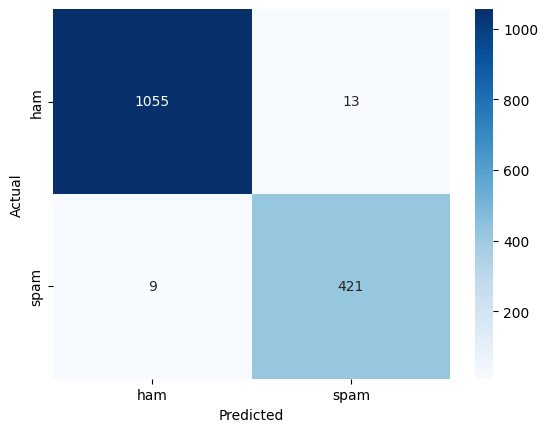

In [83]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, columns=label_names, index=label_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt='.0f'); # font size